In [33]:
import pandas as pd
import numpy as np #I can use .values with np
import matplotlib.pyplot as plt
%matplotlib inline

#Read the file and display it as a dataframe and make the original headers row 1 
raw_data = pd.read_csv('data.csv', header = None )
raw_data
#I need to do something here to fix it 

,0,1,2,3,4,5
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
5,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM
6,8:45 AM,8:54 AM,8:38 AM,8:40 AM,8:32 AM,8:41 AM
7,absent,11:00 AM,8:35 AM,8:15 AM,8:10 AM,8:10 AM
8,8:39 AM,8:13 AM,8:15 AM,8:12 AM,8:10 AM,8:00 AM
9,9:00 AM,8:50 AM,8:50 AM,8:50 AM,8:40 AM,8:45 AM


In [34]:
data = raw_data.values.reshape(-1)
data.shape

(138,)

In [35]:
data[:10],data[-10] #show the beginning and end of the data 

(array(['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM',
        '8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM'], dtype=object), '9:00 AM')

In [36]:
def convert_time_to_minutes(time_text: str) -> int: 
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00AM"""
    try: 
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds() / 60)
    except ValueError: 
            return None 

In [37]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in data]

In [38]:
y = [value for value in minutes_early_or_late if value is not None] #drop missing/None

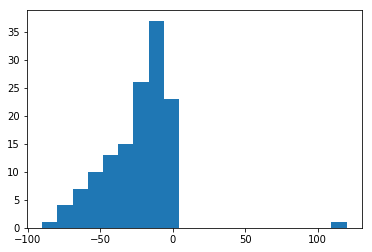

In [39]:
fig, ax = plt.subplots()
ax.hist(y, bins = 20)
plt.show()